# Top Seller Fashion Segmentation 

## Due date 2/2/24

Fashion retail has a large and ever-increasing popularity and relevance, allowing customers to buy anytime finding the best offers and providing satisfactory experiences in the shops. Consequently, Customer Relationship Management solutions have been enhanced by means of several technologies to better understand the behaviour and requirements of customers, engaging and influencing them to improve their shopping experience, as well as increasing the retailers’ profitability. Current solutions on marketing provide a too general approach, pushing and suggesting on most cases, the popular or most purchased items, losing the focus on the customer centricity and personality. <br>


In this task, you are required to perform a clustering algorithms based on top seller and total product listed.

# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import dataset

In [2]:
data = pd.read_csv('countries_with_top_sellers_fashion_c2c.csv')

# Data Exploration

In [3]:
data

,country,sellers,topsellers,topsellerratio,femalesellersratio,topfemalesellersratio,femalesellers,malesellers,topfemalesellers,topmalesellers,...,topmeanproductssold,topmeanproductslisted,meanproductssold,meanproductslisted,meanofflinedays,topmeanofflinedays,meanfollowers,meanfollowing,topmeanfollowers,topmeanfollowing
0,Taiwan,1,1,100.0,100.0,100.0,1,0,1,0,...,57.000000,56.000000,57.000000,56.000000,11.0,11.0,83.0,8.0,83.0,8.0
1,Slovaquie,2,1,50.0,0.0,0.0,0,2,0,1,...,27.000000,14.000000,14.000000,7.000000,17.0,15.0,10.5,8.5,15.0,8.0
2,Lettonie,4,2,50.0,100.0,100.0,4,0,2,0,...,40.500000,18.000000,20.750000,9.000000,120.3,11.5,21.0,52.3,38.0,98.5
3,Bulgarie,9,4,44.4,66.7,100.0,6,3,4,0,...,36.250000,17.250000,18.888889,9.111111,98.3,19.0,28.6,31.6,46.3,19.0
4,Chypre,4,1,25.0,100.0,100.0,4,0,1,0,...,41.000000,66.000000,14.000000,20.250000,17.3,11.0,21.3,10.3,39.0,17.0
5,Monaco,5,1,20.0,100.0,100.0,5,0,1,0,...,170.000000,19.000000,38.000000,5.200000,51.6,12.0,39.6,8.0,167.0,8.0
6,Roumanie,13,2,15.4,76.9,50.0,10,3,1,1,...,24.500000,19.500000,5.230769,5.923077,121.6,11.0,10.9,11.5,30.0,32.0
7,Luxembourg,7,1,14.3,85.7,100.0,6,1,1,0,...,30.000000,0.000000,6.142857,1.142857,73.6,11.0,15.9,8.4,52.0,3.0
8,Espagne,119,13,10.9,81.5,76.9,97,22,10,3,...,46.692308,23.153846,8.319328,4.991597,202.4,30.5,16.1,14.6,53.2,14.5
9,Italie,347,35,10.1,71.5,65.7,248,99,23,12,...,39.685714,30.771429,8.126801,6.391931,141.8,26.5,16.1,54.6,63.4,429.3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 19 non-null     object 
 1   sellers                 19 non-null     int64  
 2   topsellers              19 non-null     int64  
 3   topsellerratio          19 non-null     float64
 4   femalesellersratio      19 non-null     float64
 5   topfemalesellersratio   19 non-null     float64
 6   femalesellers           19 non-null     int64  
 7   malesellers             19 non-null     int64  
 8   topfemalesellers        19 non-null     int64  
 9   topmalesellers          19 non-null     int64  
 10  countrysoldratio        19 non-null     float64
 11  bestsoldratio           19 non-null     float64
 12  toptotalproductssold    19 non-null     int64  
 13  totalproductssold       19 non-null     int64  
 14  toptotalproductslisted  19 non-null     int6

# Visualize your data

Text(0, 0.5, 'Total products listed')

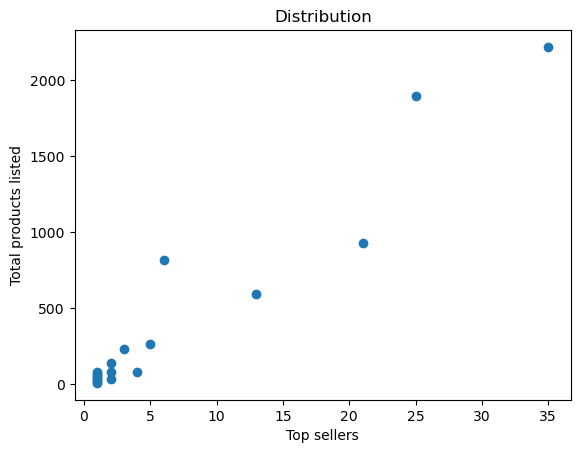

In [5]:
x = data['topsellers']
y = data['totalproductslisted']
plt.scatter(x, y)

plt.title('Distribution')
plt.xlabel('Top sellers')
plt.ylabel('Total products listed')

<Axes: >

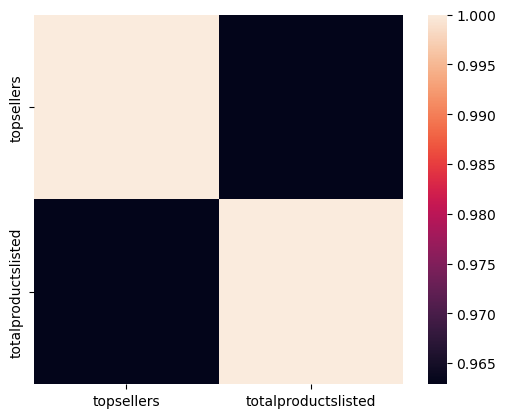

In [6]:
data1 = data.iloc[:, [2, 15]]
cor = data1.corr()

sns.heatmap(cor, square = True)

# Slice dataset

2 topsellers<br>

15 totalproductslisted

In [7]:
X = data.iloc[:, [2, 15]].values
X

array([[   1,   56],
       [   1,   14],
       [   2,   36],
       [   4,   82],
       [   1,   81],
       [   1,   26],
       [   2,   77],
       [   1,    8],
       [  13,  594],
       [  35, 2218],
       [   1,   69],
       [   1,   55],
       [   3,  231],
       [  21,  927],
       [   1,   37],
       [   5,  264],
       [   6,  816],
       [   2,  139],
       [  25, 1892]], dtype=int64)

# Normalize dataset 

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [9]:
ss = StandardScaler()
X = data.iloc[:, [2, 15]].values
XX = ss.fit_transform(X)
XX

array([[-0.59010743, -0.54952639],
       [-0.59010743, -0.61639466],
       [-0.485322  , -0.58136842],
       [-0.27575114, -0.50813176],
       [-0.59010743, -0.50972386],
       [-0.59010743, -0.59728944],
       [-0.485322  , -0.51609226],
       [-0.59010743, -0.62594726],
       [ 0.66731775,  0.3070242 ],
       [ 2.97259724,  2.892597  ],
       [-0.59010743, -0.52882907],
       [-0.59010743, -0.5511185 ],
       [-0.38053657, -0.27090864],
       [ 1.5056012 ,  0.83719399],
       [-0.59010743, -0.57977632],
       [-0.1709657 , -0.21836929],
       [-0.06618027,  0.66047073],
       [-0.485322  , -0.41738197],
       [ 1.92474292,  2.37357192]])

# Use elbow method

C:\Users\mohdz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mohdz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mohdz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mohdz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

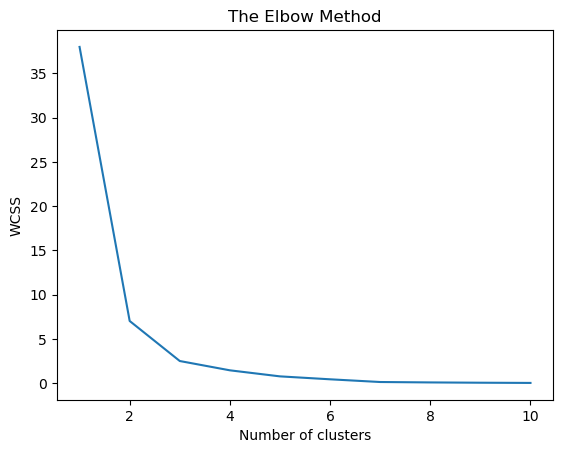

In [10]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans.fit(XX)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Clustering using Kmeans

In [11]:
kmeans = KMeans(n_clusters = 3, n_init = 'auto', random_state = 42)  
y_kmeans = kmeans.fit_predict(XX)
y_kmeans

C:\Users\mohdz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1])

# Clustering using Hieracical 

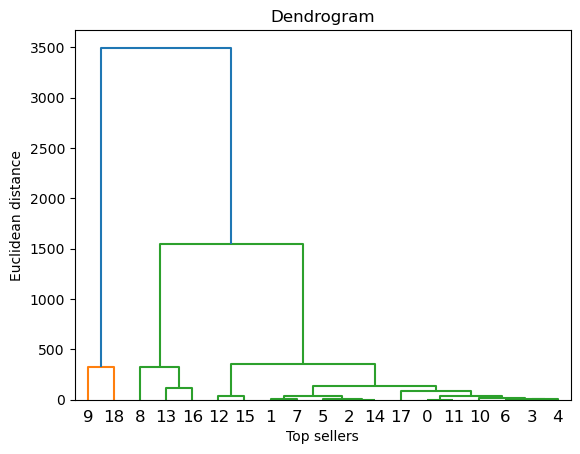

In [12]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Top sellers')
plt.ylabel('Euclidean distance')
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

C:\Users\mohdz\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


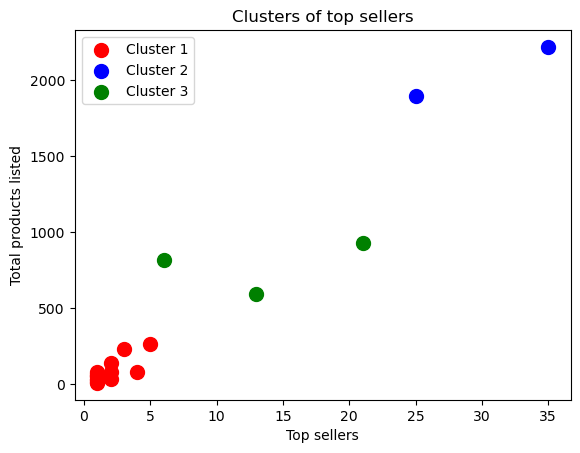

In [14]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters of top sellers')
plt.xlabel('Top sellers')
plt.ylabel('Total products listed')
plt.legend()
plt.show() 

# Silhouette score

In [15]:
score = silhouette_score(XX, kmeans.labels_, metric='euclidean')
print(score)

0.7429155534862316


# Visualization after clustering

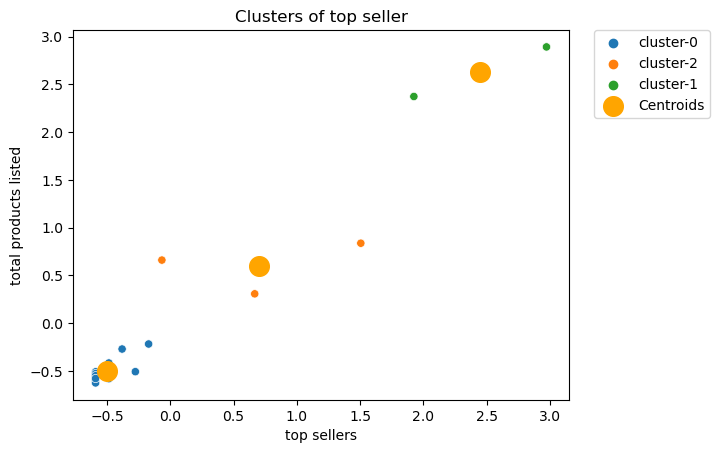

In [16]:
sns.scatterplot(x = XX[:, 0], y = XX[:, 1], hue = ["cluster-{}".format(x) for x in y_kmeans])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'orange', label = 'Centroids')
plt.title('Clusters of top seller')
plt.xlabel('top sellers')
plt.ylabel('total products listed')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 0, borderaxespad = 0.)

plt.show()